In [23]:
from landlab import Component
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import time
import datetime as datetime
from scipy.sparse import csr_matrix
from scipy.sparse import linalg

In [24]:
import numpy as np
import scipy.io as io
glacier_component_path='/home/shashank/Shashank_Github_Packages/old_landlab/landlab/landlab/components/glacier/glacier/'
import sys
sys.path.insert(0,glacier_component_path)
#from glacier import glacier
import glacier
from landlab import RasterModelGrid

In [42]:
from imview.lib import pltlib

In [3]:
def flatten(B,b_dot):
    ### flatten two dimensional matrix
    B = B.T.flatten()
    B[np.isnan(B)] = 0
    S = B
    b_dot = b_dot.T.flatten()
    return B,b_dot,S

### TO Do
######will have to include this in the pythonpath to use the module

In [25]:
data_dir='/home/shashank/nobackup_shashank/landlab/glacier/'
input_file=os.path.join(data_dir,'mb4_spin1.mat')
data_fil=io.loadmat(input_file)

In [26]:
data_fil

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Feb 10 08:52:02 2015',
 '__version__': '1.0',
 '__globals__': [],
 'mb4balance_sum': array([[-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        ..., 
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.]]),
 'b_dot': array([[-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        ..., 
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.]]),
 'new_dem': array([[  680.8218,   693.7878,   719.5477, ...,  1689.533 ,  1696.824 ,
          1711.151 ],
        [  659.343 ,   672.5099,   690.7256, ..

<IPython.core.display.Javascript object>


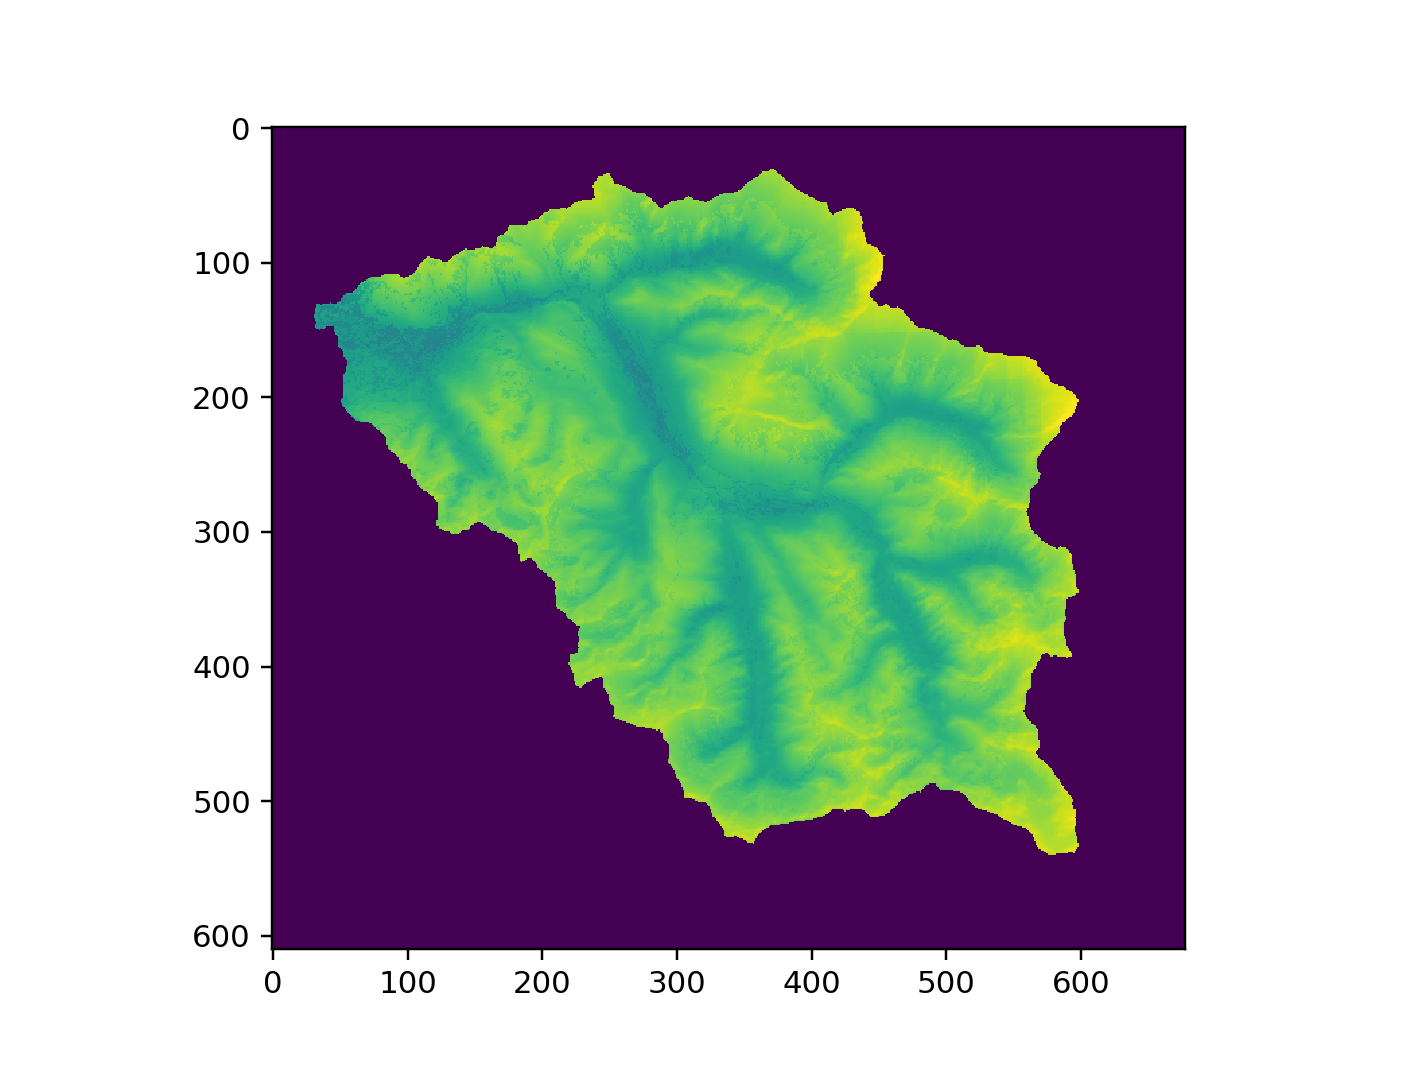

In [27]:
plt.imshow(data_fil['b_dot'])

<IPython.core.display.Javascript object>


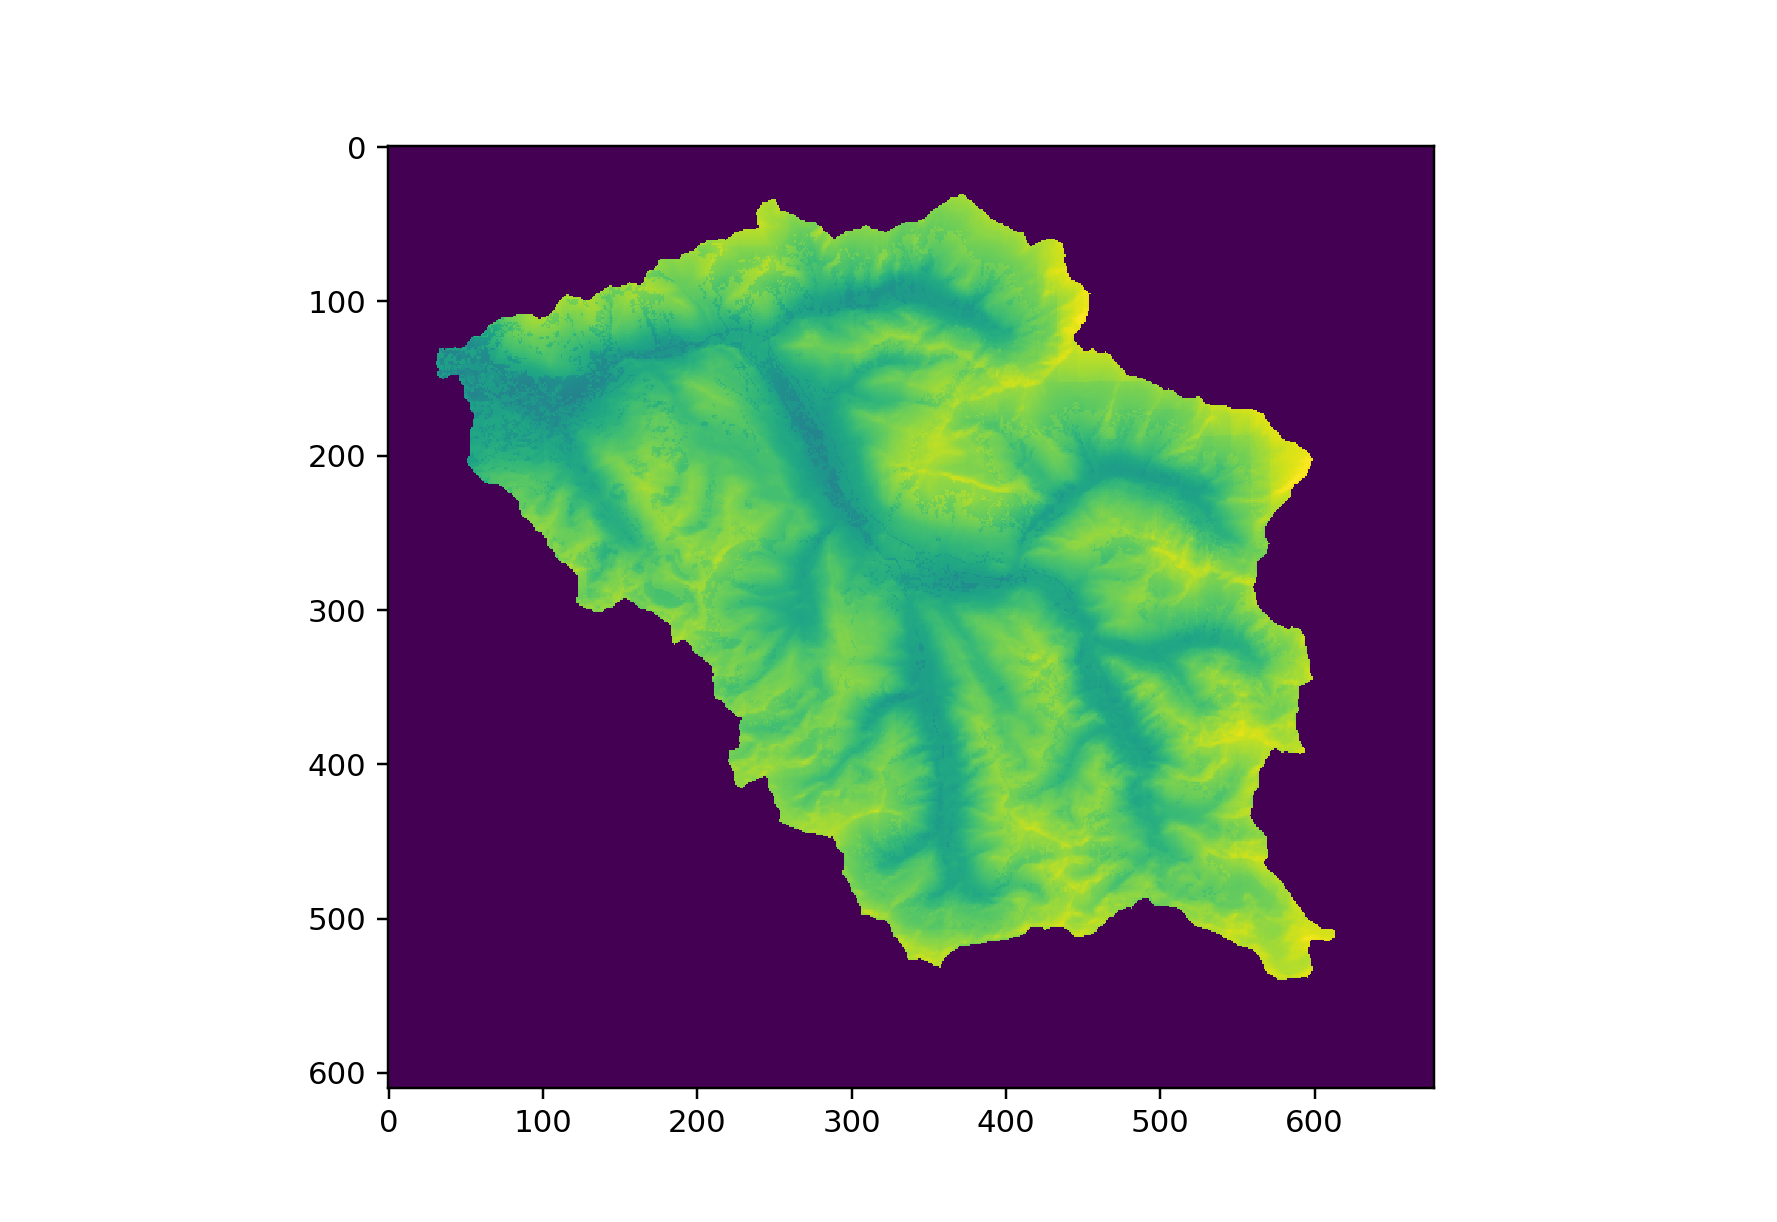

In [28]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['mb4balance_sum'])

<IPython.core.display.Javascript object>


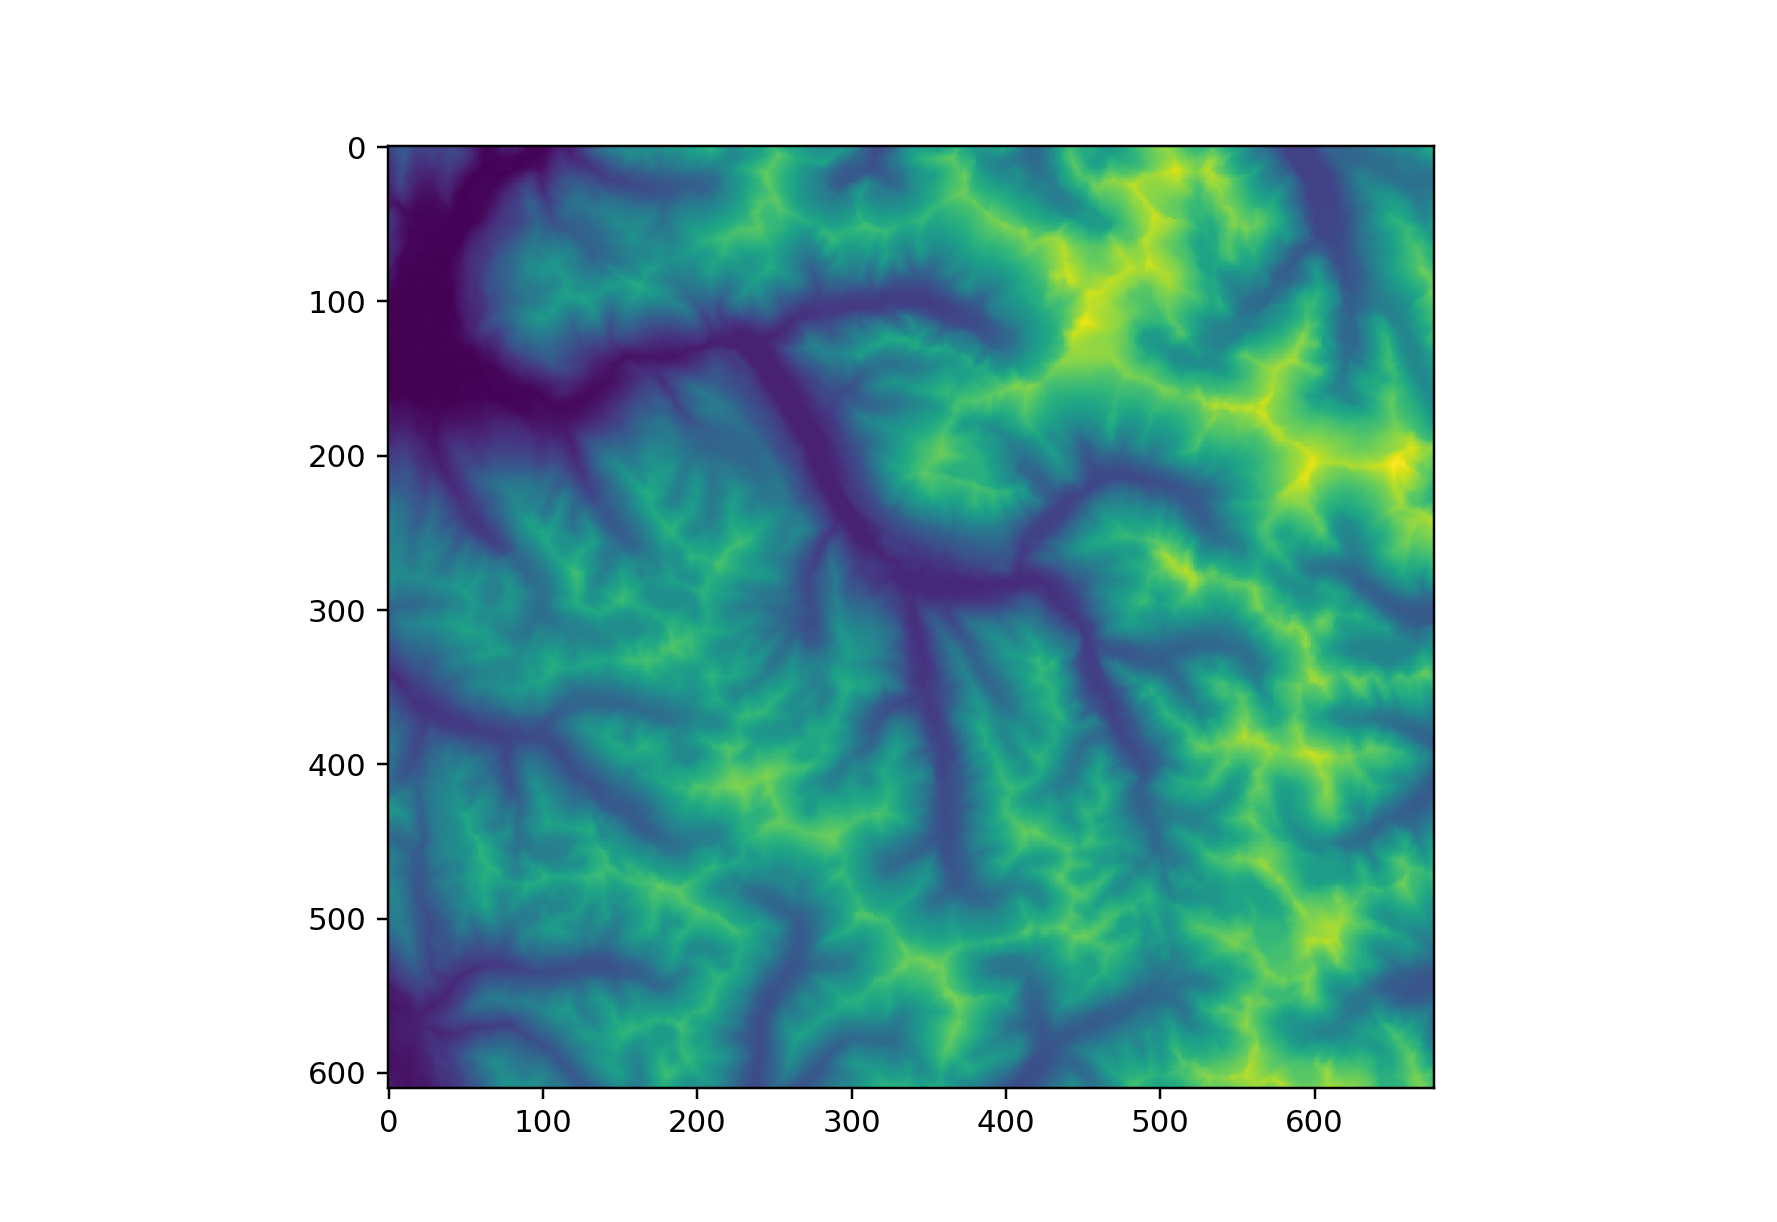

In [29]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['new_dem'])

<IPython.core.display.Javascript object>


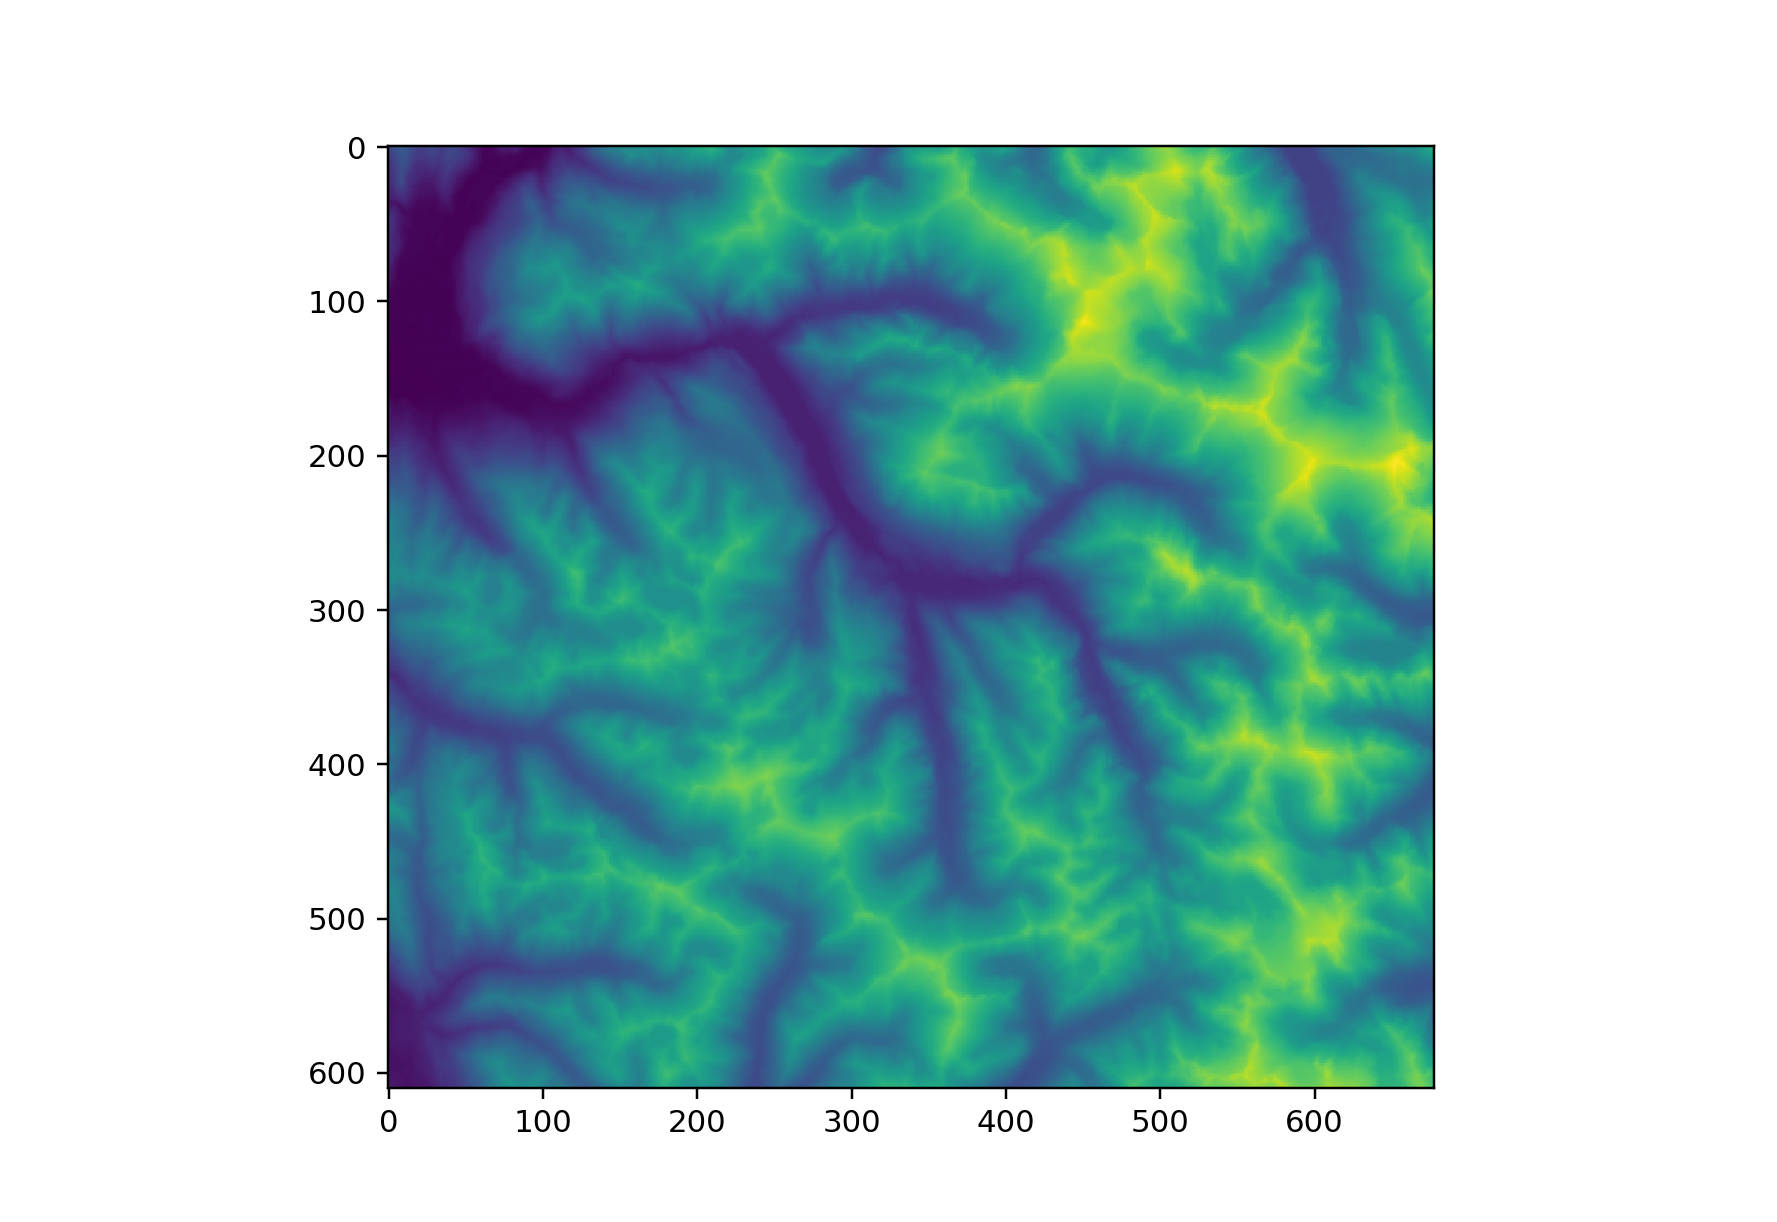

In [30]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['B'])

In [31]:
B = data_fil['B']
b_dot = data_fil['b_dot']
dx = data_fil['dx'][0,0]
dy = data_fil['dy'][0,0]
nx = np.int_(data_fil['nx'][0,0])
ny = np.int_(data_fil['ny'][0,0])
t_stop = 200
dt = 0.08333
t = 0

In [11]:
dx

50

In [32]:
#running without flattening ?
#B, b_dot, S = flatten(B,b_dot)
S = B
dictionary = {'S':S,'B':B,'b_dot':b_dot,'dt':dt,'t_STOP':t_stop,'t':t,'dx':dx,'nx':nx,'ny':ny}
grid = RasterModelGrid((int(ny),int(nx)),int(dx))

In [33]:
gla = glacier.Glacier(grid,dictionary)

In [ ]:
gla

In [ ]:
np.shape(gla.S)

In [15]:
S_map = gla.grid['node']['ice_elevation'] 	### ice surface elevation matrix
H_map = gla.grid['node']['ice_thickness']	### ice thickness matrix
I_map = gla.grid['node']['I_map'] ### ice mask matrix

In [35]:
np.shape(S_map)

(413580,)

In [37]:
S_map = (S_map.reshape(np.shape(data_fil['b_dot'])))
H_map = (H_map.reshape(np.shape(data_fil['b_dot'])))
I_map = (I_map.reshape((np.shape(data_fil['b_dot']))))

<IPython.core.display.Javascript object>


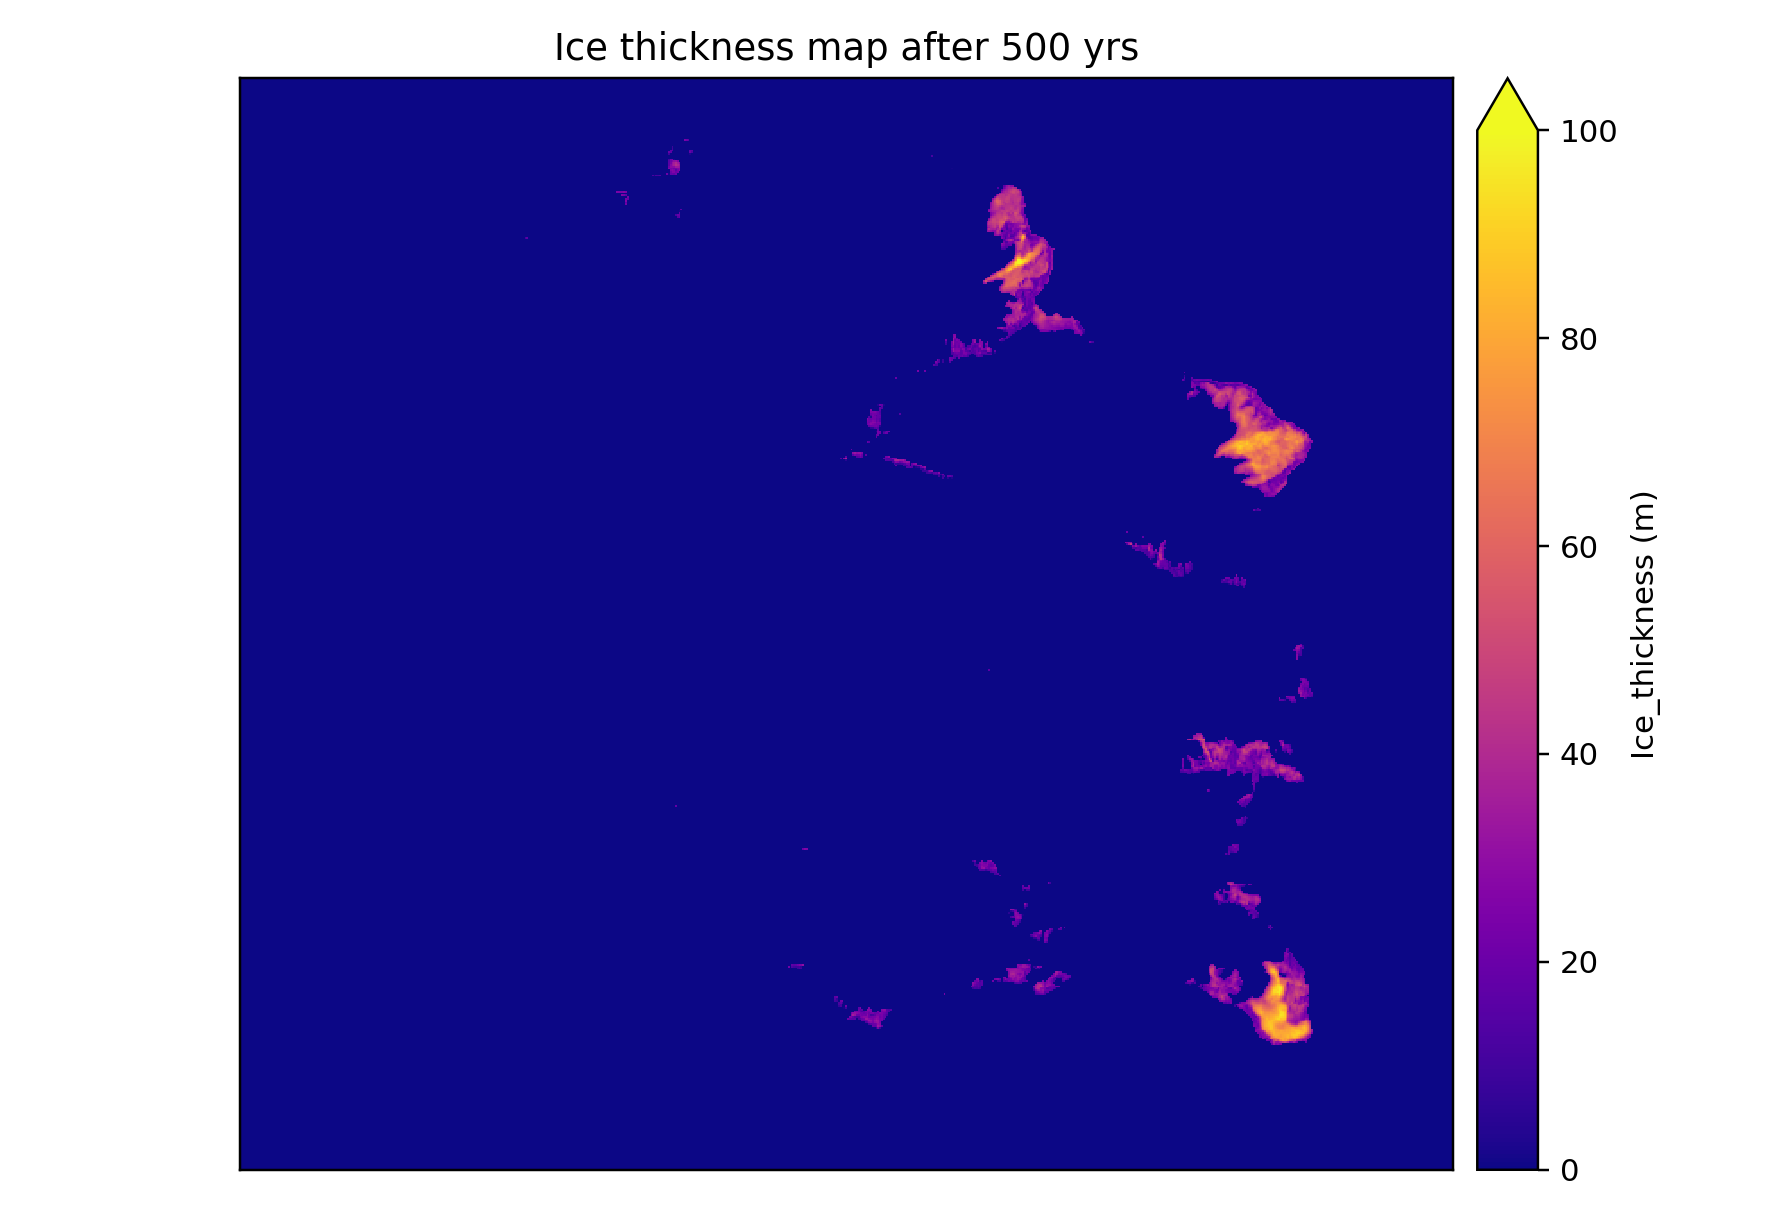

In [45]:
fig,ax=plt.subplots(figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(H_map,ax=ax,cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 500 yrs',clim=(0,100))

<IPython.core.display.Javascript object>


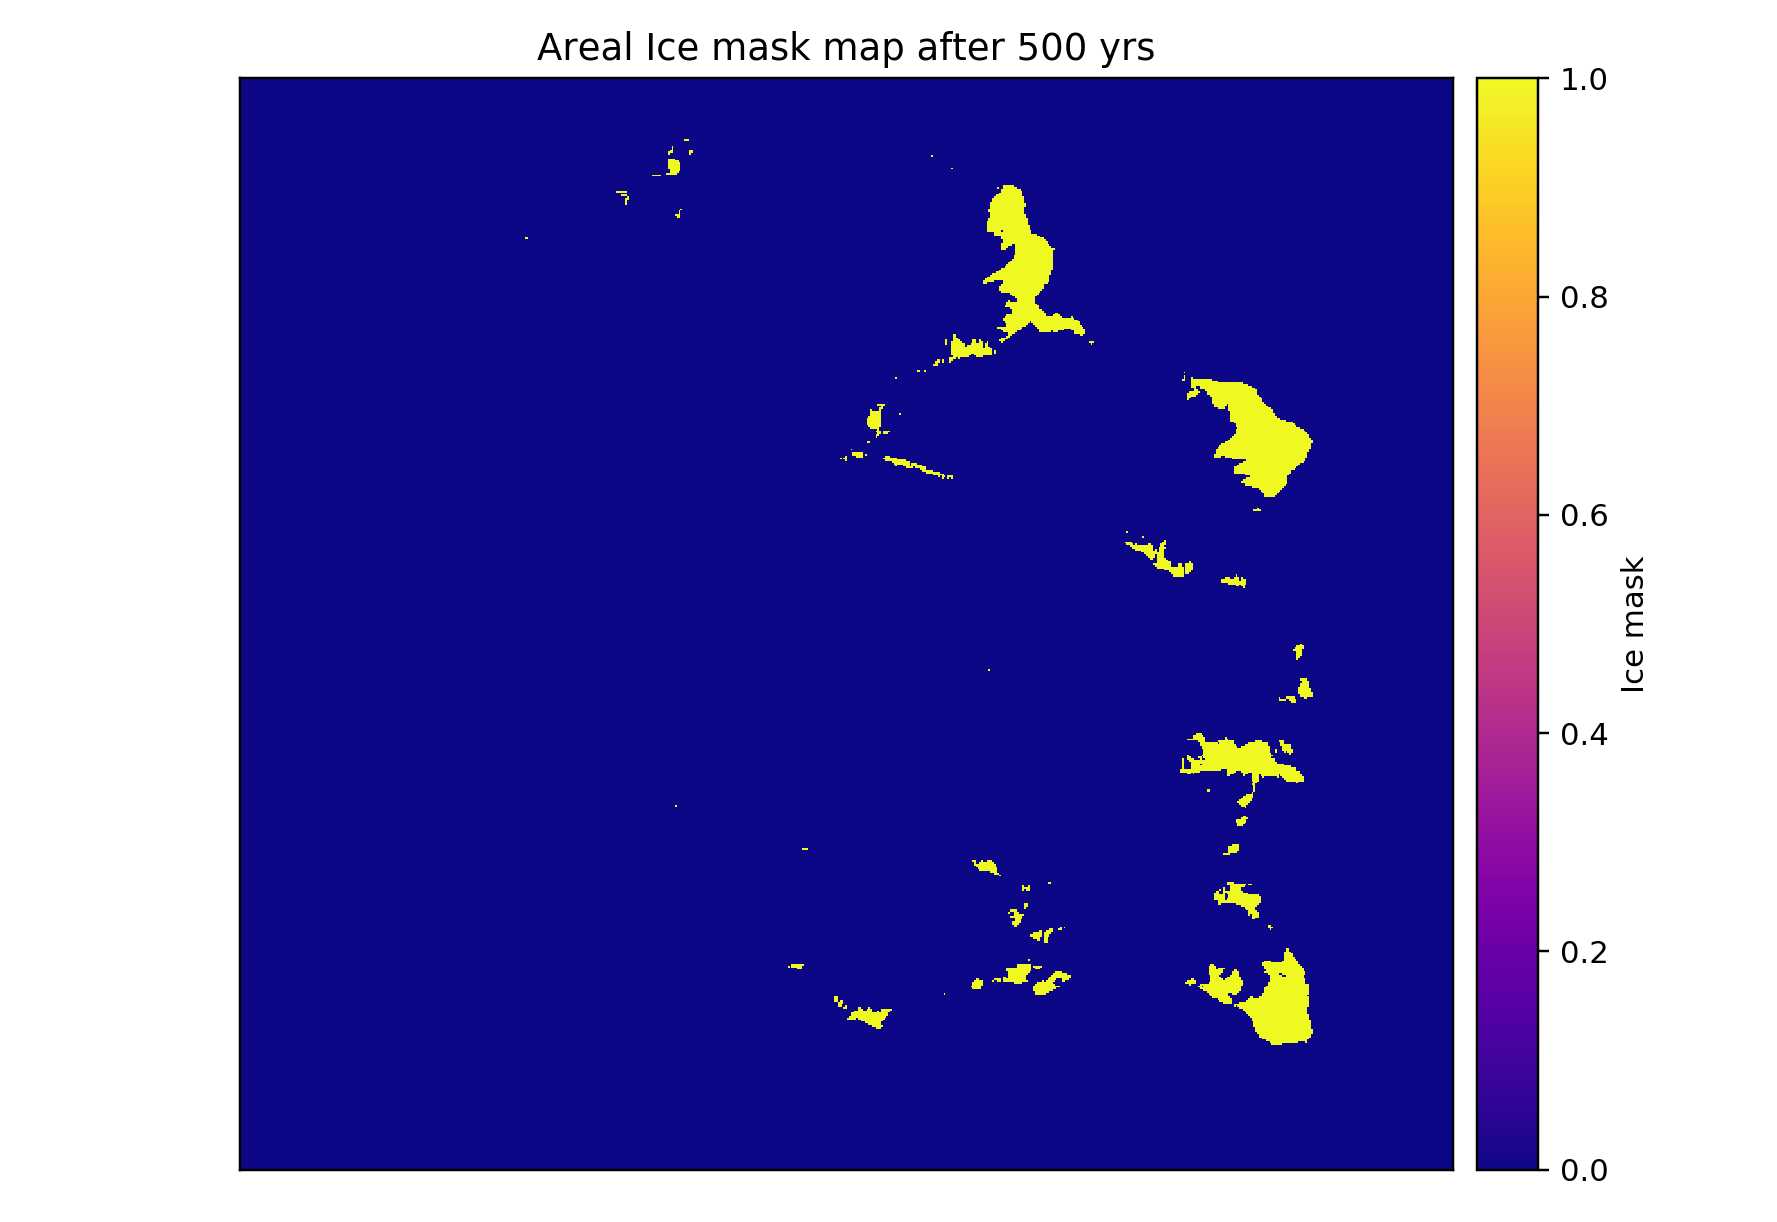

In [48]:
fig,ax=plt.subplots(figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(I_map,ax=ax,cmap='plasma',label='Ice mask', title='Areal Ice mask map after 500 yrs')

In [ ]:
fig,ax=plt.subplots(figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(H_map,ax=ax,cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 500 yrs',clim=(0,100))

In [ ]:
type(ny)

In [ ]:
type(ny.astype(int64))

In [ ]:
type(int(ny))

In [19]:
from landlab.plot import imshow_node_grid